#### Real Estate Across the United States (REXUS) Inventory (Building)

**Real Estate Across the United States (REXUS) is the primary tool used by PBS to track and manage the government's real property assets and to store inventory data, building data, customer data, and lease information. STAR manages aspects of real property space management, including identification of all building space and daily management of 22,000 assignments for all property to its client Federal agencies. This data set contains PBS building inventory that consists of both owned and leased buildings with active and excess status.**

**Data Dictionary**

**Location Code :** A code representing the location of the building.

**Region Code :** Code representing the region where the building is located.

**Bldg Address1:** Street address of the building.

**Bldg Address2:** Additional address information (if any).

**Bldg City:** City where the building is located.

**Bldg County:** County where the building is located.

**Bldg State:** State where the building is located.

**Bldg Zip:** ZIP code of the building's location.

**Congressional District:** Congressional district associated with the building's location.

**Bldg Status:** Indicates whether the building is active.

**Property Type:** Type of property (e.g., Building, Structure).

**Bldg ANSI Usable:** Usable area of the building according to ANSI standards.

**Total Parking Spaces:** Total parking spaces associated with the building.

**Owned/Leased:** Indicates whether the building is owned or leased.

**Construction Date:** Date when the building was constructed.

**Historical Type:** Type of historical designation.

**Historical Status:** Historical status of the building.

**ABA Accessibility Flag:** Flag indicating ABA (Architectural Barriers Act) accessibility.

In [1]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Support vector classifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv("data_gov_bldg_rexus_new.csv")

In [3]:
df.head()

,Location Code,Region Code,Bldg Address1,Bldg Address2,Bldg City,Bldg County,Bldg State,Bldg Zip,Congressional District,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Construction Date,Historical Type,Historical Status,ABA Accessibility Flag
0,CT0013,1,135 HIGH ST,,HARTFORD,HARTFORD,CT,61031125,,ACTIVE,BUILDING,93394,28,OWNED,01 January 1933,Field Not In Use,National Register Listed,Will Conform
1,CT0024,1,141 CHURCH ST,U.S. COURTHOUSE,NEW HAVEN,NEW HAVEN,CT,65102001,,ACTIVE,BUILDING,67174,0,OWNED,01 January 1919,Field Not In Use,National Register Listed,Will Conform
2,CT0047,1,135 GRAND ST,,WATERBURY,NEW HAVEN,CT,67029998,,ACTIVE,BUILDING,269,0,LEASED,01 January 1933,Field Not In Use,National Register Listed,Will Conform
3,CT0053,1,450 MAIN ST,,HARTFORD,HARTFORD,CT,61031804,,ACTIVE,BUILDING,197999,105,OWNED,01 January 1963,Field Not In Use,,Will Conform
4,CT0059,1,915 LAFAYETTE BLVD,,BRIDGEPORT,FAIRFIELD,CT,66044706,,ACTIVE,BUILDING,85551,131,OWNED,01 January 1967,Field Not In Use,,Will Conform


In [4]:
df.shape

(8793, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Location Code            8793 non-null   object
 1   Region Code              8793 non-null   int64 
 2   Bldg Address1            8793 non-null   object
 3   Bldg Address2            8791 non-null   object
 4   Bldg City                8793 non-null   object
 5   Bldg County              8793 non-null   object
 6   Bldg State               8793 non-null   object
 7   Bldg Zip                 8793 non-null   int64 
 8   Congressional District   8793 non-null   object
 9   Bldg Status              8793 non-null   object
 10  Property Type            8793 non-null   object
 11  Bldg ANSI Usable         8793 non-null   int64 
 12  Total Parking Spaces     8793 non-null   int64 
 13  Owned/Leased             8793 non-null   object
 14  Construction Date        8793 non-null  

In [6]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location Code,8793,8793,CT0013,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region Code,8793.0,NaN,NaN,NaN,6.198112,2.887701,1.0,4.0,6.0,9.0,11.0
Bldg Address1,8793,7727,2701 MARTIN LUTHER KING JR AVE SE,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bldg Address2,8791,535,,8036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bldg City,8793,1938,WASHINGTON,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bldg County,8793,934,DISTRICT OF COLUMBIA,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bldg State,8793,56,TX,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bldg Zip,8793.0,NaN,NaN,NaN,465004732.22552,324904513.742083,605.0,200162705.0,422404944.0,785216762.0,999019998.0
Congressional District,8793,3,,8791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bldg Status,8793,3,ACTIVE,8740,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Check for Duplicates records
dups = df.duplicated()
print("Number of duplicate rows = %d" % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Location Code,Region Code,Bldg Address1,Bldg Address2,Bldg City,Bldg County,Bldg State,Bldg Zip,Congressional District,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Construction Date,Historical Type,Historical Status,ABA Accessibility Flag


#### Visualizing the Data

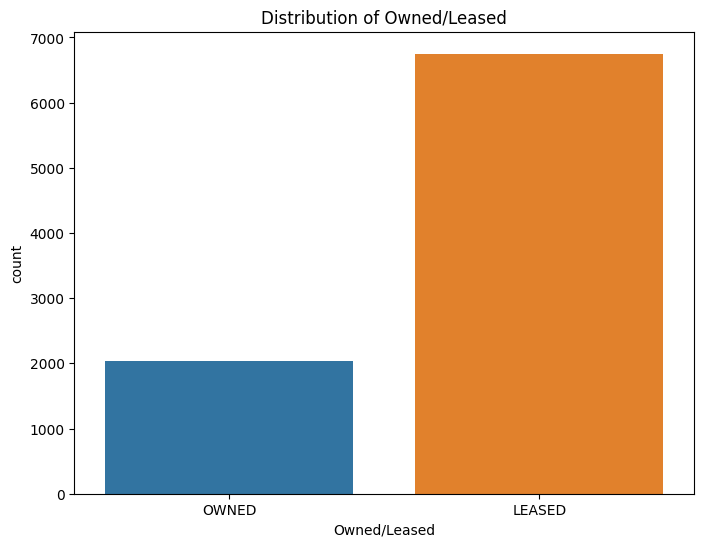

In [8]:
#Bar plot for Target Distribution
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (8,6))
sns.countplot(x ='Owned/Leased',data = df)
plt.title("Distribution of Owned/Leased")
plt.show()

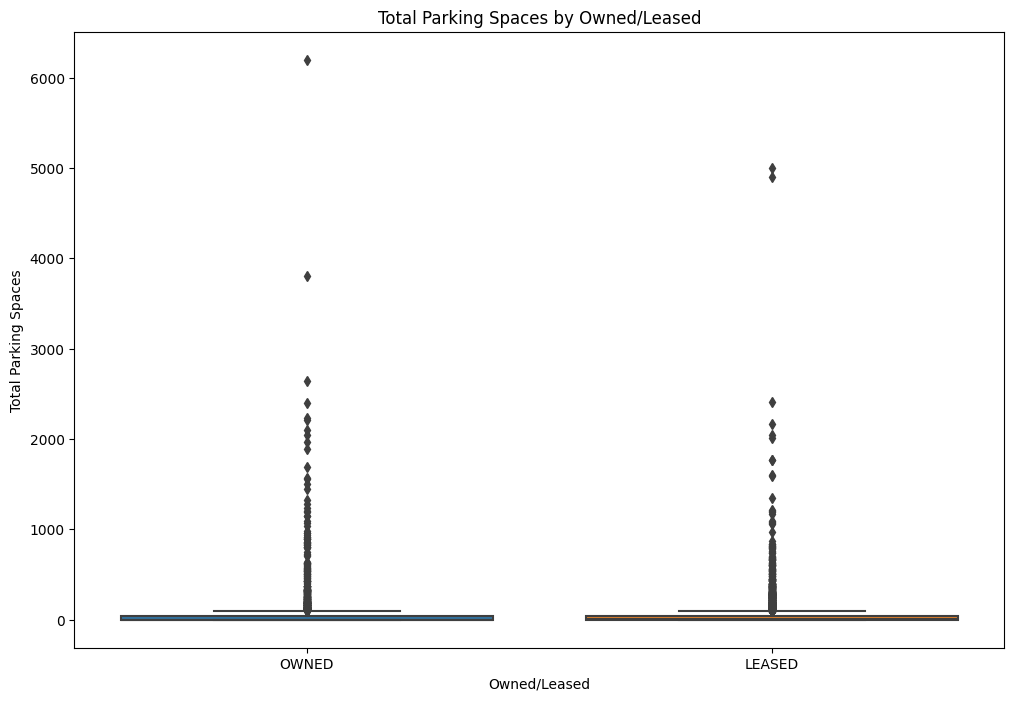

In [9]:
#Box plot for Numeric Features by Owned/Leased
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Owned/Leased', y = 'Total Parking Spaces', data = df)
plt.title('Total Parking Spaces by Owned/Leased')
plt.show()

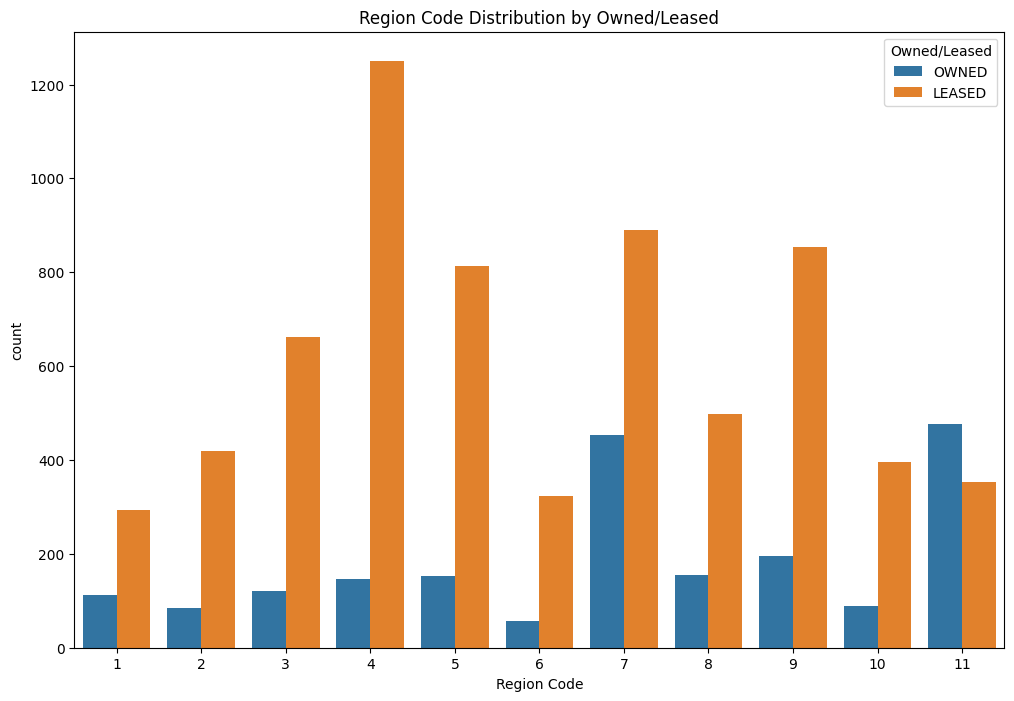

In [10]:
#Count plot for Categorical Features by Owned/Leased
plt.figure(figsize = (12,8))
sns.countplot(x='Region Code', hue = 'Owned/Leased', data = df)
plt.title("Region Code Distribution by Owned/Leased")
plt.show()

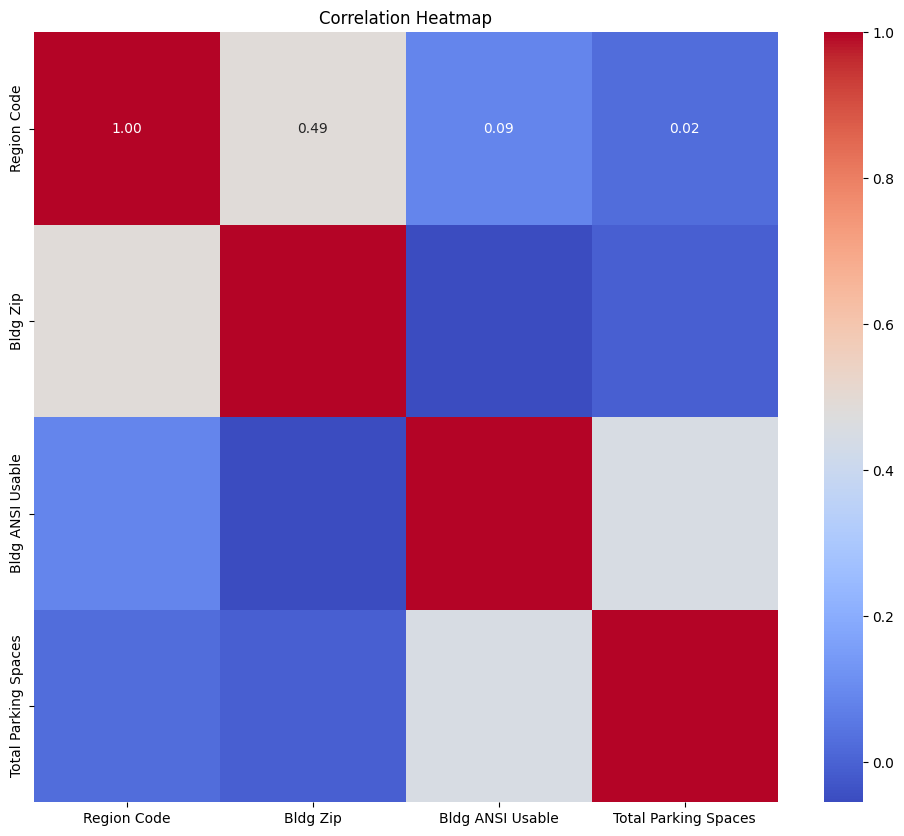

In [11]:
#Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
#Checking for missing values
df.isnull().sum()[df.isnull().sum()>0]

Bldg Address2    2
dtype: int64

In [13]:
mode1 = df["Bldg Address2"].mode().values[0]

df["Bldg Address2"] = df["Bldg Address2"].replace(np.nan, mode1)

In [14]:
#Checking for missing values in the data
df.isnull().sum()

Location Code              0
Region Code                0
Bldg Address1              0
Bldg Address2              0
Bldg City                  0
Bldg County                0
Bldg State                 0
Bldg Zip                   0
Congressional District     0
Bldg Status                0
Property Type              0
Bldg ANSI Usable           0
Total Parking Spaces       0
Owned/Leased               0
Construction Date          0
Historical Type            0
Historical Status          0
ABA Accessibility Flag     0
dtype: int64

In [15]:
#Dropping the columns
columns_to_drop = ['Congressional District','Historical Type','Region Code']
df = df.drop(columns = columns_to_drop)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Location Code            8793 non-null   object
 1   Bldg Address1            8793 non-null   object
 2   Bldg Address2            8793 non-null   object
 3   Bldg City                8793 non-null   object
 4   Bldg County              8793 non-null   object
 5   Bldg State               8793 non-null   object
 6   Bldg Zip                 8793 non-null   int64 
 7   Bldg Status              8793 non-null   object
 8   Property Type            8793 non-null   object
 9   Bldg ANSI Usable         8793 non-null   int64 
 10  Total Parking Spaces     8793 non-null   int64 
 11  Owned/Leased             8793 non-null   object
 12  Construction Date        8793 non-null   object
 13  Historical Status        8793 non-null   object
 14  ABA Accessibility Flag   8793 non-null  

In [17]:
#Renaming the column from Bldg County to Bldg Country
df.rename(columns = {'Bldg County': 'Bldg Country'}, inplace = True)

In [18]:
df['ABA Accessibility Flag '] = df['ABA Accessibility Flag '].replace({'Will Conform': 'Will Confirm'})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Location Code            8793 non-null   object
 1   Bldg Address1            8793 non-null   object
 2   Bldg Address2            8793 non-null   object
 3   Bldg City                8793 non-null   object
 4   Bldg Country             8793 non-null   object
 5   Bldg State               8793 non-null   object
 6   Bldg Zip                 8793 non-null   int64 
 7   Bldg Status              8793 non-null   object
 8   Property Type            8793 non-null   object
 9   Bldg ANSI Usable         8793 non-null   int64 
 10  Total Parking Spaces     8793 non-null   int64 
 11  Owned/Leased             8793 non-null   object
 12  Construction Date        8793 non-null   object
 13  Historical Status        8793 non-null   object
 14  ABA Accessibility Flag   8793 non-null  

In [20]:
df['ABA Accessibility Flag '].unique()

array(['Will Confirm', 'Yes', 'No'], dtype=object)

In [21]:
mode2 = df['Historical Status'].mode().values[0]

df['Historical Status'] = df['Historical Status'].replace(np.nan, mode2)

In [22]:
#deriving year and month from the column
df['Cons_Year'] = pd.to_datetime(df['Construction Date']).dt.year
df['Cons_Month'] = pd.to_datetime(df['Construction Date']).dt.month

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Location Code            8793 non-null   object
 1   Bldg Address1            8793 non-null   object
 2   Bldg Address2            8793 non-null   object
 3   Bldg City                8793 non-null   object
 4   Bldg Country             8793 non-null   object
 5   Bldg State               8793 non-null   object
 6   Bldg Zip                 8793 non-null   int64 
 7   Bldg Status              8793 non-null   object
 8   Property Type            8793 non-null   object
 9   Bldg ANSI Usable         8793 non-null   int64 
 10  Total Parking Spaces     8793 non-null   int64 
 11  Owned/Leased             8793 non-null   object
 12  Construction Date        8793 non-null   object
 13  Historical Status        8793 non-null   object
 14  ABA Accessibility Flag   8793 non-null  

In [24]:
df.head()

,Location Code,Bldg Address1,Bldg Address2,Bldg City,Bldg Country,Bldg State,Bldg Zip,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Construction Date,Historical Status,ABA Accessibility Flag,Cons_Year,Cons_Month
0,CT0013,135 HIGH ST,,HARTFORD,HARTFORD,CT,61031125,ACTIVE,BUILDING,93394,28,OWNED,01 January 1933,National Register Listed,Will Confirm,1933,1
1,CT0024,141 CHURCH ST,U.S. COURTHOUSE,NEW HAVEN,NEW HAVEN,CT,65102001,ACTIVE,BUILDING,67174,0,OWNED,01 January 1919,National Register Listed,Will Confirm,1919,1
2,CT0047,135 GRAND ST,,WATERBURY,NEW HAVEN,CT,67029998,ACTIVE,BUILDING,269,0,LEASED,01 January 1933,National Register Listed,Will Confirm,1933,1
3,CT0053,450 MAIN ST,,HARTFORD,HARTFORD,CT,61031804,ACTIVE,BUILDING,197999,105,OWNED,01 January 1963,,Will Confirm,1963,1
4,CT0059,915 LAFAYETTE BLVD,,BRIDGEPORT,FAIRFIELD,CT,66044706,ACTIVE,BUILDING,85551,131,OWNED,01 January 1967,,Will Confirm,1967,1


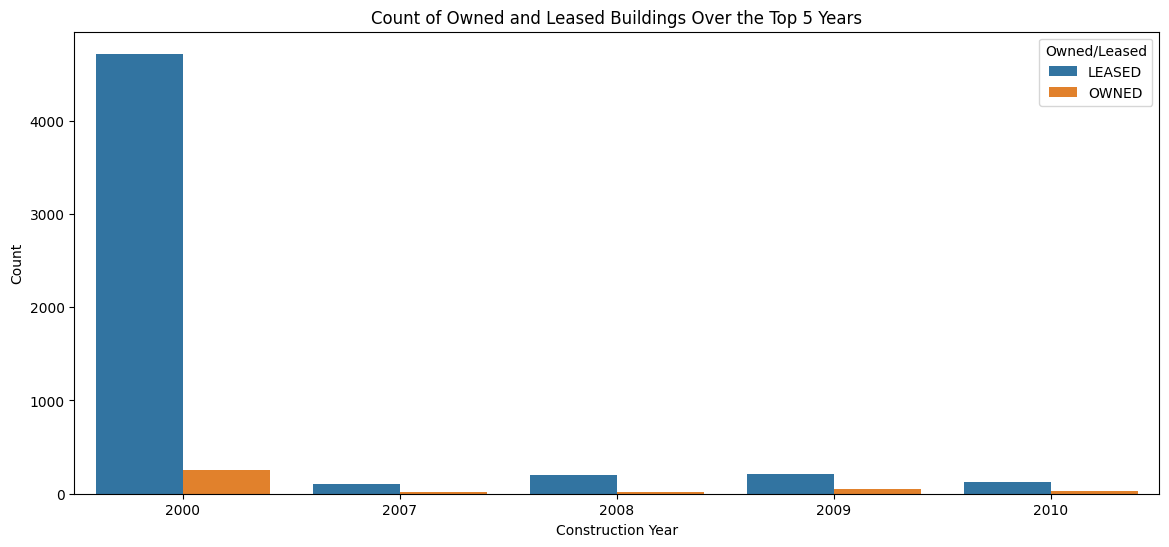

In [25]:
# Find the top 5 years based on the count of buildings
top_years = df['Cons_Year'].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 years
df_top_years = df[df['Cons_Year'].isin(top_years)]

# Bar plot for Owned/Leased over the top 5 years
plt.figure(figsize=(14, 6))
sns.countplot(x='Cons_Year', hue='Owned/Leased', data=df_top_years)
plt.title('Count of Owned and Leased Buildings Over the Top 5 Years')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.show()

In [26]:
#Label Encoding few columns 
# Specify columns to label encode
columns_to_encode = ['Bldg City', 'Bldg Country', 'Bldg State', 'Bldg Status', 'Property Type',
                      'Owned/Leased', 'Historical Status', 'ABA Accessibility Flag ']

#Initialize Label Encoder
label_encoder = LabelEncoder()

#Apply label encoding to each specified column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [27]:
df.head()

,Location Code,Bldg Address1,Bldg Address2,Bldg City,Bldg Country,Bldg State,Bldg Zip,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Construction Date,Historical Status,ABA Accessibility Flag,Cons_Year,Cons_Month
0,CT0013,135 HIGH ST,,724,370,7,61031125,0,0,93394,28,1,01 January 1933,3,1,1933,1
1,CT0024,141 CHURCH ST,U.S. COURTHOUSE,1182,586,7,65102001,0,0,67174,0,1,01 January 1919,3,1,1919,1
2,CT0047,135 GRAND ST,,1820,586,7,67029998,0,0,269,0,0,01 January 1933,3,1,1933,1
3,CT0053,450 MAIN ST,,724,370,7,61031804,0,0,197999,105,1,01 January 1963,0,1,1963,1
4,CT0059,915 LAFAYETTE BLVD,,199,284,7,66044706,0,0,85551,131,1,01 January 1967,0,1,1967,1


In [28]:
#Dropping column 'Bldg Zip', 'Construction Date'
df = df.drop('Bldg Zip', axis =1)
df = df.drop('Construction Date', axis =1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Location Code            8793 non-null   object
 1   Bldg Address1            8793 non-null   object
 2   Bldg Address2            8793 non-null   object
 3   Bldg City                8793 non-null   int32 
 4   Bldg Country             8793 non-null   int32 
 5   Bldg State               8793 non-null   int32 
 6   Bldg Status              8793 non-null   int32 
 7   Property Type            8793 non-null   int32 
 8   Bldg ANSI Usable         8793 non-null   int64 
 9   Total Parking Spaces     8793 non-null   int64 
 10  Owned/Leased             8793 non-null   int32 
 11  Historical Status        8793 non-null   int32 
 12  ABA Accessibility Flag   8793 non-null   int32 
 13  Cons_Year                8793 non-null   int64 
 14  Cons_Month               8793 non-null  

In [30]:
df.head()

,Location Code,Bldg Address1,Bldg Address2,Bldg City,Bldg Country,Bldg State,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Historical Status,ABA Accessibility Flag,Cons_Year,Cons_Month
0,CT0013,135 HIGH ST,,724,370,7,0,0,93394,28,1,3,1,1933,1
1,CT0024,141 CHURCH ST,U.S. COURTHOUSE,1182,586,7,0,0,67174,0,1,3,1,1919,1
2,CT0047,135 GRAND ST,,1820,586,7,0,0,269,0,0,3,1,1933,1
3,CT0053,450 MAIN ST,,724,370,7,0,0,197999,105,1,0,1,1963,1
4,CT0059,915 LAFAYETTE BLVD,,199,284,7,0,0,85551,131,1,0,1,1967,1


In [31]:
#One hot encoding for nominal categorical columns
df = pd.get_dummies(df, columns = ['Location Code', 'Bldg Address1', 'Bldg Address2'])

In [32]:
df.head()

,Bldg City,Bldg Country,Bldg State,Bldg Status,Property Type,Bldg ANSI Usable,Total Parking Spaces,Owned/Leased,Historical Status,ABA Accessibility Flag,...,Bldg Address2_US HIGHWAY 90,Bldg Address2_US HWY 89 @ CANADIAN BORDER,Bldg Address2_WALNUT & ORCHARD STS,Bldg Address2_WAREHOUSE 2,"Bldg Address2_WASHINGTON,DC",Bldg Address2_WEST,Bldg Address2_WEST POTOMAC PARK,Bldg Address2_WESTPARK BUSINESS CTR,Bldg Address2_WHITE PLAINS,Bldg Address2_YORK VILLAGE BUILDING 6 SUITE C
0,724,370,7,0,0,93394,28,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,1182,586,7,0,0,67174,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,1820,586,7,0,0,269,0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
3,724,370,7,0,0,197999,105,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,199,284,7,0,0,85551,131,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Train Test Split
X = df.drop('Owned/Leased',axis =1)

#Copy target into the y dataframe
y = df['Owned/Leased']

In [34]:
#Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1, stratify = df['Owned/Leased'])

In [35]:
y_train.value_counts(1)

0    0.767669
1    0.232331
Name: Owned/Leased, dtype: float64

In [36]:
y_test.value_counts(1)

0    0.767627
1    0.232373
Name: Owned/Leased, dtype: float64

# Logistic Regression

In [37]:
#Logistic Regression Model
#Fit the Logistic Regression model
model = LogisticRegression(solver = 'newton-cg', max_iter = 10000, penalty = 'none', verbose = True, n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed: 98.4min finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

#### Predicting on Training and Test Dataset

In [38]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the predicted classes and probs

In [39]:
ytest_predict_prob = model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.000000,8.511801e-08
1,0.055411,9.445889e-01
2,0.999999,9.709022e-07
3,0.999998,1.838193e-06
4,0.999999,9.701939e-07


In [40]:
#Model Evaluation
model.score(X_train, y_train)

1.0

### AUC and ROC for the training data

AUC: 1.000


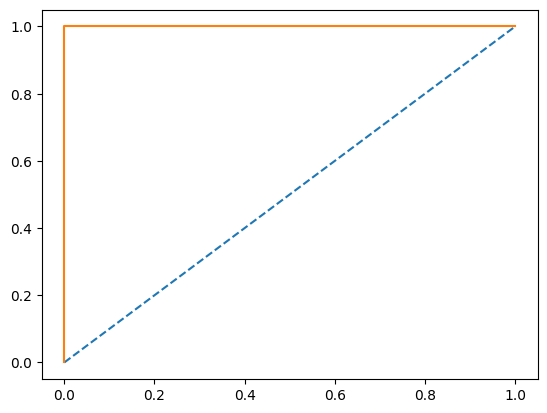

In [41]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [42]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8934799090219864

### AUC and ROC for the test data

AUC: 1.000


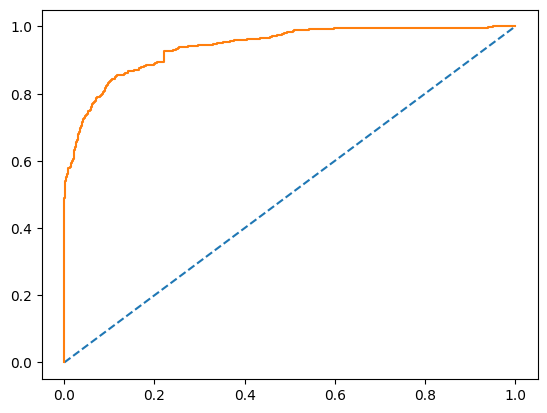

In [43]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for training data

In [44]:
confusion_matrix(y_train, ytrain_predict)

array([[4725,    0],
       [   0, 1430]], dtype=int64)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


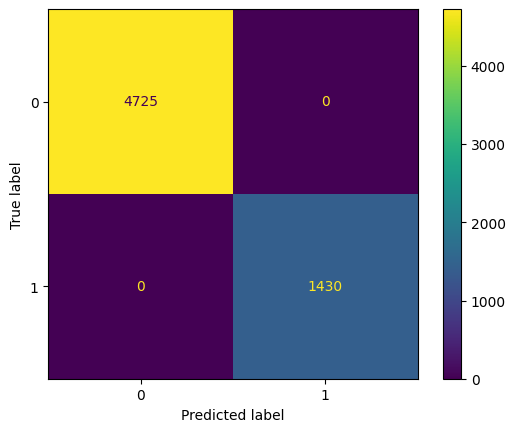

In [45]:
plot_confusion_matrix(model,X_train,y_train);

In [46]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4725
           1       1.00      1.00      1.00      1430

    accuracy                           1.00      6155
   macro avg       1.00      1.00      1.00      6155
weighted avg       1.00      1.00      1.00      6155



### Confusion Matrix for test data

In [47]:
confusion_matrix(y_test, ytest_predict)

array([[2007,   18],
       [ 263,  350]], dtype=int64)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


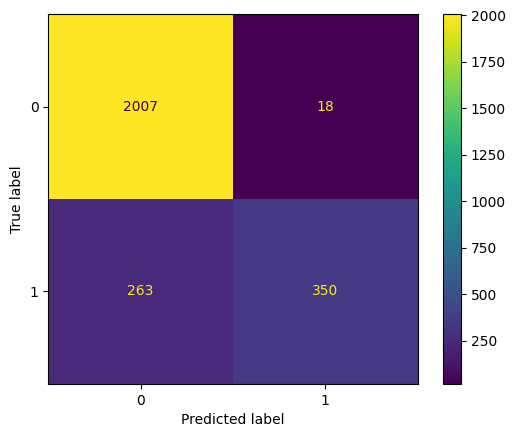

In [48]:
plot_confusion_matrix(model,X_test,y_test);

In [49]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2025
           1       0.95      0.57      0.71       613

    accuracy                           0.89      2638
   macro avg       0.92      0.78      0.82      2638
weighted avg       0.90      0.89      0.88      2638



# Decision Tree 

In [50]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[4725    0]
 [   0 1430]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4725
           1       1.00      1.00      1.00      1430

    accuracy                           1.00      6155
   macro avg       1.00      1.00      1.00      6155
weighted avg       1.00      1.00      1.00      6155



In [52]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9480667172100076
[[1955   70]
 [  67  546]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2025
           1       0.89      0.89      0.89       613

    accuracy                           0.95      2638
   macro avg       0.93      0.93      0.93      2638
weighted avg       0.95      0.95      0.95      2638



# Random Forest Classifier


In [53]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [54]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[4725    0]
 [   0 1430]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4725
           1       1.00      1.00      1.00      1430

    accuracy                           1.00      6155
   macro avg       1.00      1.00      1.00      6155
weighted avg       1.00      1.00      1.00      6155



In [55]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9476876421531463
[[2007   18]
 [ 120  493]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2025
           1       0.96      0.80      0.88       613

    accuracy                           0.95      2638
   macro avg       0.95      0.90      0.92      2638
weighted avg       0.95      0.95      0.95      2638



**In this case, the decision tree and random forest have similar accuracy, but the decision tree has a slightly better balance between precision and recall for Class 1. Therefore, based on the provided metrics, the decision tree may be considered the better model.**